In [1]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/absa-dataset/input/bert-single/loc1_safety/train.tsv
/kaggle/input/absa-dataset/input/bert-single/loc1_safety/test.tsv
/kaggle/input/absa-dataset/input/bert-single/loc1_safety/dev.tsv
/kaggle/input/absa-dataset/input/bert-single/loc1_general/train.tsv
/kaggle/input/absa-dataset/input/bert-single/loc1_general/test.tsv
/kaggle/input/absa-dataset/input/bert-single/loc1_general/dev.tsv
/kaggle/input/absa-dataset/input/bert-single/loc2_safety/train.tsv
/kaggle/input/absa-dataset/input/bert-single/loc2_safety/test.tsv
/kaggle/input/absa-dataset/input/bert-single/loc2_safety/dev.tsv
/kaggle/input/absa-dataset/input/bert-single/loc1_price/train.tsv
/kaggle/input/absa-dataset/input/bert-single/loc1_price/test.tsv
/kaggle/input/absa-dataset/input/bert-single/loc1_price/dev.tsv
/kaggle/input/absa-dataset/input/bert-single/loc2_transit/train.tsv
/kaggle/input/absa-dataset/input/bert-single/loc2_transit/test.tsv
/kaggle/input/absa-dataset/input/bert-single/loc2_transit/dev.tsv
/kaggle

In [2]:
data_dir ='/kaggle/input/absa-dataset/input/sentihood/'

In [3]:
in_file = os.path.join(data_dir, 'sentihood-train.json')

In [4]:
def parse_sentihood_json(in_file):
    with open(in_file) as f:
        data = json.load(f)
    ret = []
    for d in data:
        text = d['text']
        sent_id = d['id']
        opinions = []
        targets = set()
        for opinion in d['opinions']:
            sentiment = opinion['sentiment']
            aspect = opinion['aspect']
            target_entity = opinion['target_entity']
            targets.add(target_entity)
            opinions.append((target_entity, aspect, sentiment))
        ret.append((sent_id, text, opinions))
    return ret

In [5]:
import json

train = parse_sentihood_json(in_file)

In [6]:
test_file = os.path.join(data_dir, 'sentihood-test.json')

In [7]:
test = parse_sentihood_json(test_file)

In [8]:
all_aspects = ['general', 'price', 'transit-location', 'safety']
def convert_input(data):
    ret = []
    for sent_id, text, opinions in data:
        for target_entity, aspect, sentiment in opinions:
            if aspect not in all_aspects:
                continue
            ret.append((sent_id, text, target_entity, aspect, sentiment))
    return ret

In [9]:
test = convert_input(test)
test = pd.DataFrame(test)

test['id'] = test[0]
test['text'] = test[1]
test['target_entity'] = test[2]
test['label'] = test[3]
test['sentiment'] = test[4]

test = test.drop(0, axis=1)
test = test.drop(1, axis = 1)
test = test.drop(2, axis = 1)
test = test.drop(3, axis=1)
test = test.drop(4, axis=1)

In [10]:
test.head()

,id,text,target_entity,label,sentiment
0,153,LOCATION1 is in Greater London and is a ve...,LOCATION1,safety,Positive
1,1130,All the neighborhoods around LOCATION1 are v...,LOCATION1,general,Positive
2,1130,All the neighborhoods around LOCATION1 are v...,LOCATION1,safety,Positive
3,1271,"Cheap is LOCATION2, LOCATION1, but not reall...",LOCATION1,general,Negative
4,1271,"Cheap is LOCATION2, LOCATION1, but not reall...",LOCATION1,price,Positive


In [11]:
train = convert_input(train)
train = pd.DataFrame(train)

train['id'] = train[0]
train['text'] = train[1]
train['target_entity'] = train[2]
train['label'] = train[3]
train['sentiment'] = train[4]

train = train.drop(0, axis=1)
train = train.drop(1, axis = 1)
train = train.drop(2, axis = 1)
train = train.drop(3, axis=1)
train = train.drop(4, axis=1)

In [12]:
train.head()

,id,text,target_entity,label,sentiment
0,1430,LOCATION1 is transforming and the prices w...,LOCATION1,price,Negative
1,1244,And LOCATION1 is ten mins direct on the tube...,LOCATION1,transit-location,Positive
2,209,Another option is LOCATION1 which is very ce...,LOCATION1,transit-location,Positive
3,2824,Best bet is around LOCATION2 and LOCATION1 a...,LOCATION1,general,Positive
4,2824,Best bet is around LOCATION2 and LOCATION1 a...,LOCATION2,general,Positive


In [13]:
test['text'] = test['text'] + ' ' + test['target_entity']
test.head()

,id,text,target_entity,label,sentiment
0,153,LOCATION1 is in Greater London and is a ve...,LOCATION1,safety,Positive
1,1130,All the neighborhoods around LOCATION1 are v...,LOCATION1,general,Positive
2,1130,All the neighborhoods around LOCATION1 are v...,LOCATION1,safety,Positive
3,1271,"Cheap is LOCATION2, LOCATION1, but not reall...",LOCATION1,general,Negative
4,1271,"Cheap is LOCATION2, LOCATION1, but not reall...",LOCATION1,price,Positive


In [14]:
train['text'] = train['text'] + ' ' + train['target_entity']
#test_df['sentence1'] = test_df['sentence1'] + ' ' + test_df['sentence2'] + ' ' + test_df['label']
train.head(5)

,id,text,target_entity,label,sentiment
0,1430,LOCATION1 is transforming and the prices w...,LOCATION1,price,Negative
1,1244,And LOCATION1 is ten mins direct on the tube...,LOCATION1,transit-location,Positive
2,209,Another option is LOCATION1 which is very ce...,LOCATION1,transit-location,Positive
3,2824,Best bet is around LOCATION2 and LOCATION1 a...,LOCATION1,general,Positive
4,2824,Best bet is around LOCATION2 and LOCATION1 a...,LOCATION2,general,Positive


In [15]:
train=train.drop(["target_entity"],axis=1)


In [16]:
test = test.drop(["target_entity"], axis=1)

In [17]:
test.head()

,id,text,label,sentiment
0,153,LOCATION1 is in Greater London and is a ve...,safety,Positive
1,1130,All the neighborhoods around LOCATION1 are v...,general,Positive
2,1130,All the neighborhoods around LOCATION1 are v...,safety,Positive
3,1271,"Cheap is LOCATION2, LOCATION1, but not reall...",general,Negative
4,1271,"Cheap is LOCATION2, LOCATION1, but not reall...",price,Positive


In [18]:
train.head()

,id,text,label,sentiment
0,1430,LOCATION1 is transforming and the prices w...,price,Negative
1,1244,And LOCATION1 is ten mins direct on the tube...,transit-location,Positive
2,209,Another option is LOCATION1 which is very ce...,transit-location,Positive
3,2824,Best bet is around LOCATION2 and LOCATION1 a...,general,Positive
4,2824,Best bet is around LOCATION2 and LOCATION1 a...,general,Positive


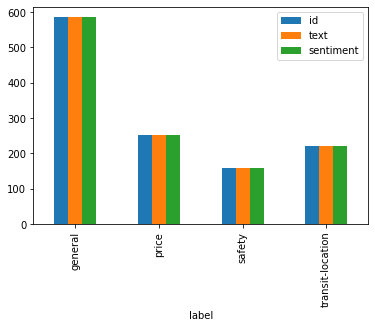

In [19]:
test.groupby('label').count().plot.bar()

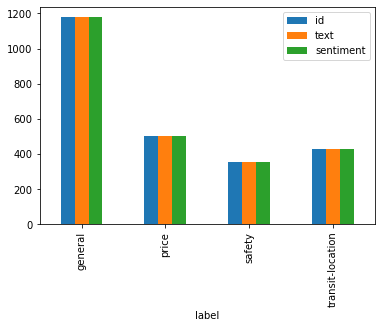

In [20]:
train.groupby('label').count().plot.bar()

In [21]:
import transformers

MAX_LEN = 512
TRAIN_BATCH_SIZE = 12
VALID_BATCH_SIZE = 12
EPOCHS = 10
BERT_PATH = "../input/bert-base-uncased/"
MODEL_PATH = "model.bin"
TRAINING_FILE = "../input/absa-dataset/input/bert-pair/train_NLI_M.tsv"
DEV_FILE = "../input/absa-dataset/input/bert-pair/dev_NLI_M.tsv"
TEST_FILE = "../input/absa-dataset/input/bert-pair/test_NLI_M.tsv"
TOKENIZER = transformers.BertTokenizer.from_pretrained(BERT_PATH, do_lower_case=True)


wandb: WARNING W&B installed but not logged in.  Run `wandb login` or set the WANDB_API_KEY env variable.


In [22]:
import torch

class BERTDataset:
    def __init__(self, sentence1s,targets):
        self.sentence1s = sentence1s
        #self.sentence2s = sentence2s
        self.targets = targets
        self.tokenizer = TOKENIZER
        self.max_len = MAX_LEN
        
    def __len__(self):
        return len(self.sentence1s)
                   
        
    def __getitem__(self, item):
        sentence1 = str(self.sentence1s[item])
        sentence1 = " ".join(sentence1.split())
        
        #sentence2 = str(self.sentence2s[item])
        #sentence2 = " ".join(sentence2.split())

        inputs = self.tokenizer.encode_plus(sentence1,
                                            None,
                                            add_special_tokens=True, 
                                            max_length=self.max_len,
                                            pad_to_max_length=True,
                                           )

        ids = inputs["input_ids"]
        mask = inputs["attention_mask"]
        token_type_ids = inputs["token_type_ids"]
        
        return {
            "ids": torch.tensor(ids, dtype=torch.long),
            "mask": torch.tensor(mask, dtype=torch.long),
            "token_type_ids": torch.tensor(token_type_ids, dtype=torch.long),
            "targets": torch.tensor(self.targets[item], dtype=torch.long),
        }


In [23]:
import transformers
import torch.nn as nn


class BERTBaseUncased(nn.Module):
    def __init__(self):
        super(BERTBaseUncased, self).__init__()
        self.bert = transformers.BertModel.from_pretrained(BERT_PATH)
        self.bert_drop = nn.Dropout(0.3)
        self.out = nn.Linear(768, 4)

    def forward(self, ids, mask, token_type_ids):
        _, o2 = self.bert(ids, attention_mask=mask, token_type_ids=token_type_ids)
        bo = self.bert_drop(o2)
        output = self.out(bo)
        return output

In [24]:
import torch
import torch.nn as nn
from tqdm import tqdm
import pdb


def loss_fn(outputs, targets):
    #targets = torch.argmax(targets, 1)
    #loss = nn.CrossEntropyLoss()(outputs, targets.view(-1, 1))
    loss = nn.CrossEntropyLoss()(outputs, targets)
    
    return loss


def train_fn(data_loader, model, optimizer, device, scheduler):
    model.train()

    for bi, d in tqdm(enumerate(data_loader), total=len(data_loader)):
        ids = d["ids"]
        token_type_ids = d["token_type_ids"]
        mask = d["mask"]
        targets = d["targets"]

        ids = ids.to(device, dtype=torch.long)
        token_type_ids = token_type_ids.to(device, dtype=torch.long)
        mask = mask.to(device, dtype=torch.long)
        #pdb.set_trace()
        targets = targets.to(device, dtype=torch.long)
        #pdb.set_trace()

        optimizer.zero_grad()
        outputs = model(ids=ids, mask=mask, token_type_ids=token_type_ids)
        loss = loss_fn(outputs, targets)
        loss.backward()
        optimizer.step()
        scheduler.step()


def eval_fn(data_loader, model, device):
    model.eval()
    fin_targets = []
    fin_outputs = []
    with torch.no_grad():
        for bi, d in tqdm(enumerate(data_loader), total=len(data_loader)):
            ids = d["ids"]
            token_type_ids = d["token_type_ids"]
            mask = d["mask"]
            targets = d["targets"]

            ids = ids.to(device, dtype=torch.long)
            token_type_ids = token_type_ids.to(device, dtype=torch.long)
            mask = mask.to(device, dtype=torch.long)
            targets = targets.to(device, dtype=torch.long)

            outputs = model(ids=ids, mask=mask, token_type_ids=token_type_ids)
            act = nn.Softmax(dim=1)
            outputs = act(outputs)
            fin_targets.extend(targets.detach().cpu().numpy().tolist())
            fin_outputs.extend(outputs.cpu().numpy().tolist())
            
    return fin_outputs, fin_targets

In [25]:
import torch
import pandas as pd
import torch.nn as nn
import numpy as np

#from model import BERTBaseUncased
from sklearn import model_selection
from sklearn import metrics
from transformers import AdamW
from transformers import get_linear_schedule_with_warmup
from sklearn import preprocessing

def run():
    
    encoder = preprocessing.LabelEncoder()
    train.loc[:, "label"] = encoder.fit_transform(train["label"])
    #dev_df.loc[:, "label"] = encoder.transform(dev_df["label"])
    test.loc[:, "label"] = encoder.transform(test["label"])
    
    
    train_dataset = BERTDataset(sentence1s = train.text.values, targets=train.label.values)
    
    train_data_loader = torch.utils.data.DataLoader(train_dataset, batch_size=TRAIN_BATCH_SIZE, num_workers=4)
    
    valid_dataset = BERTDataset(sentence1s = test.text.values,targets=test.label.values)
    
    valid_data_loader = torch.utils.data.DataLoader(valid_dataset, batch_size=VALID_BATCH_SIZE, num_workers=4)
    
    device = torch.device("cuda")
    model = BERTBaseUncased()
    model.to(device)
    
    param_optimizer = list(model.named_parameters())
    no_decay = ["bias", "LayerNorm.bias", "LayerNorm.weight"]
    optimizer_parameters = [{"params": [p for n, p in param_optimizer if not any(nd in n for nd in no_decay)], "weight_decay": 0.001,},
                            {"params": [p for n, p in param_optimizer if any(nd in n for nd in no_decay)], "weight_decay": 0.0,},]
    num_train_steps = int(len(train) / TRAIN_BATCH_SIZE * EPOCHS)
    optimizer = AdamW(optimizer_parameters, lr=3e-5)
    scheduler = get_linear_schedule_with_warmup(optimizer, num_warmup_steps=0, num_training_steps=num_train_steps)
    
    model = nn.DataParallel(model)
    
    best_accuracy = 0
    
    for epoch in range(EPOCHS):
        print(epoch)
        train_fn(train_data_loader, model, optimizer, device, scheduler)
        outputs, targets = eval_fn(valid_data_loader, model, device)
        #pdb.set_trace()
        outputs = torch.tensor(outputs)
        outputs = torch.argmax(outputs, dim=1)
        #outputs = np.array(outputs) >= 0.5
        accuracy = metrics.accuracy_score(targets, outputs)
        print(f"Accuracy Score =", {accuracy})
        if accuracy > best_accuracy:
            torch.save(model.state_dict(), MODEL_PATH)
            best_accuracy = accuracy
            
if __name__ == "__main__":
    run()


0


100%|██████████| 102/102 [00:22<00:00,  4.60it/s]


Accuracy Score = {0.7442434210526315}
1


100%|██████████| 102/102 [00:22<00:00,  4.61it/s]


Accuracy Score = {0.756578947368421}
2


100%|██████████| 102/102 [00:22<00:00,  4.58it/s]


Accuracy Score = {0.7623355263157895}
3


100%|██████████| 102/102 [00:22<00:00,  4.59it/s]

Accuracy Score = {0.7606907894736842}
4



100%|██████████| 102/102 [00:22<00:00,  4.61it/s]

Accuracy Score = {0.759046052631579}
5



100%|██████████| 102/102 [00:22<00:00,  4.60it/s]


Accuracy Score = {0.765625}
6


100%|██████████| 102/102 [00:22<00:00,  4.61it/s]

Accuracy Score = {0.759046052631579}
7



100%|██████████| 102/102 [00:22<00:00,  4.61it/s]

Accuracy Score = {0.765625}
8



100%|██████████| 102/102 [00:22<00:00,  4.58it/s]


Accuracy Score = {0.7672697368421053}
9


100%|██████████| 102/102 [00:22<00:00,  4.62it/s]

Accuracy Score = {0.7631578947368421}


In [26]:
# data1 = pd.read_csv("../input/absa-dataset/input/bert-pair/dev_NLI_M.tsv", sep='\t')

In [27]:
# data1.head()

In [28]:
# data1['target'] = data1['sentence2'].apply(lambda x: x.split('-')[2])
# data1['1_2'] = data1['sentence2'].apply(lambda x: x.split('-')[1])

In [29]:
# data1['target'].head()

In [30]:
# data1.head(-5)

In [31]:
# def changeForFun(data1):
#     rest = []
#     for index, row in data1.iterrows():
#         response = {}
#         ids = row['id']
#         text = row['sentence1']
#         target_aspect = row['sentence2']
#         sentiment = row['label']

#         response = {
#             "opinions": [{
#                 "sentiment": sentiment,
#                 "aspect": target_aspect,
#                 "target_entity": target_aspect}
#             ],
#             "id": ids,
#             "text": text
#         }
#         rest.append(response)
#     return rest
    
    

In [32]:
# rest = changeForFun(data1)

In [33]:
# print(rest)